In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ряд Фурье
Любая периодическая функция $x(t)$ может быть представлена в виде ряда гармонически связанных 
синусов и косинусов.

$x(t)$ является периодической функцией с периодом $T$: 

$$ \large x(t)=x(t+nT), $$

n - целое число.

Тогда, $x(t)$ можно представить с помощью ряда Фурье:

$$ \large
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos(2\pi \frac{nt}{T})+b_n\sin(2\pi\frac{nt}{T}),$$

где $a_n$ и $b_n$ являются коэффициентами Фурье и определяются следующим образом
$$ \large
\begin{align}a_n&=\frac{2}{T}\int_0^Tx(t)\cos(2\pi \frac{nt}{T})dt\\
b_n&=\frac{2}{T}\int_0^Tx(t)\sin(2\pi \frac{nt}{T})dt\end{align}$$

Частота $\frac{n}{T}$ называется $n$-й *гармоникой.*

- Ряд Фурье разлагает периодическую функцию с периодом T на синусы и косинусы с частотами $\frac{n}{T}, n=0,1,2,\ldots$ которые называются $n$-й гармоникой сигнала. Чем больше гармоник используется, тем точнее можно описать функцию (исходный сигнал).
- Для **четных функций**, т.е. $x(t)=x(-t)$, ряд Фурье **состоит только из косинусов**. Для **нечетных функций**, т.е. $x(t)=-x(-t)$, ряд Фурье **состоит только из синусов**.
- На скачках и разрывах исходного сигнала наблюдаются большие колебания. Это явление называется эффектом Гиббса (связано с усечением ряда Фурье). По обе стороны перепадов появляются выбросы и затухающие колебания с частотой, близкой к частоте первого отброшенного члена ряда.

### Задание:
Реализовать функцию расчета коэффициентов Фурье ($a_n$ и $b_n$) и функцию восстановления исходного сигнала $x(t)$ по гармоникам. В качества исходного сигнала рассмотреть прямоугольный сигнал.

[0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.052351411245168435, -0.12009469040600172, -0.003326810656871101, 0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.052351411245168435, -0.12009469040600172, -0.003326810656871101, -0.05759942585822376, 0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.052351411245168435, -0.12009469040600172, -0.003326810656871101, -0.05759942585822376, -0.050354557282314465, 0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.052351411245168435, -0.12009469040600172, -0.003326810656871101, -0.05759942585822376, -0.050354557282314465, 0.014833210633905752, 0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.052351411245168435, -0.12009469040600172, -0.003326810656871101, -0.05759942585822376, -0.050354557282314465, 0.014833210633905752, -0.036180339887499136, 0.64, 0.14998681261392277, -0.24333952127600517, -0.019979923680274504, -0.

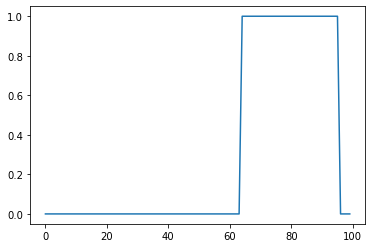

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_rect = np.zeros(100) 
x_rect[64:96] = 1
plt.plot(x_rect)

T = len(x_rect)
t = np.arange(T)
xt=np.zeros(T)
an=[]
bn=[]
Nh=5
for Nh in range (5,21):
    Nh=Nh+1
    for n in range(Nh+1):
        s=0; s1=0
        for i in range(T):
            s+=np.cos(2*np.pi*n*i/T)*x_rect[i]
            s1+=np.sin(2*np.pi*n*i/T)*x_rect[i]
        an.append(s*(2/T))
        bn.append(s1*(2/T))
      
print(an)        
print(bn)   

#### Примечание

1. Функция расчета коэффициентов. На входе - сигнал и количество гармоник n. Интеграл в формулах расчета коэффициентов $a_n$ и $b_n$ заменяется суммированием. В цикле необходимо расчитать эти коэффициенты (цикл до n+1). Период $T$ представляется длиной входного списка, т.е. сигнала, а $t$ - это временные отсчеты (t = np.arange(T) или же используйте функцию range(), если хотите получить список).
2. Функция восстановления исходного сигнала. На входе - период, который в формуле обозначен как $T$ и коэффициенты $a_n$ и $b_n$ ($t$ определяется как в функции расчета коэффициентов). Обратите внимание в формуле на $a_0$, (n=0).
3. Для получения прямоугольного сигнала можете воспользоваться функциями np.zeros() или np.ones().
4. Выполнить восстановление прямоугольного сигнала до N-той гармоники (N = 5, 20).
5. Результаты представить на графике.

Прямоугольный сигнал выглядит следующим образом:

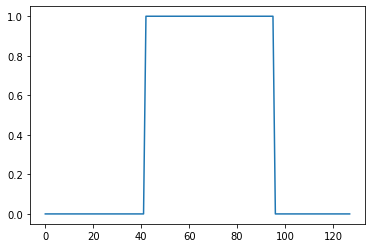

In [13]:
plt.plot(x)

Пример того, что у вас должно быть в результате:

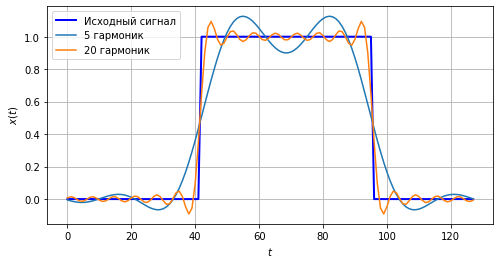

In [16]:
plt.figure(figsize=(8,4))
plt.plot(x, 'b', label='Исходный сигнал', lw=2)
plt.plot(t, reconstruct(len(t), Fcoeff[:5,:]), label='5 гармоник')
plt.plot(t, reconstruct(len(t), Fcoeff[:20,:]), label='20 гармоник')
plt.grid(True)
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.legend()